In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

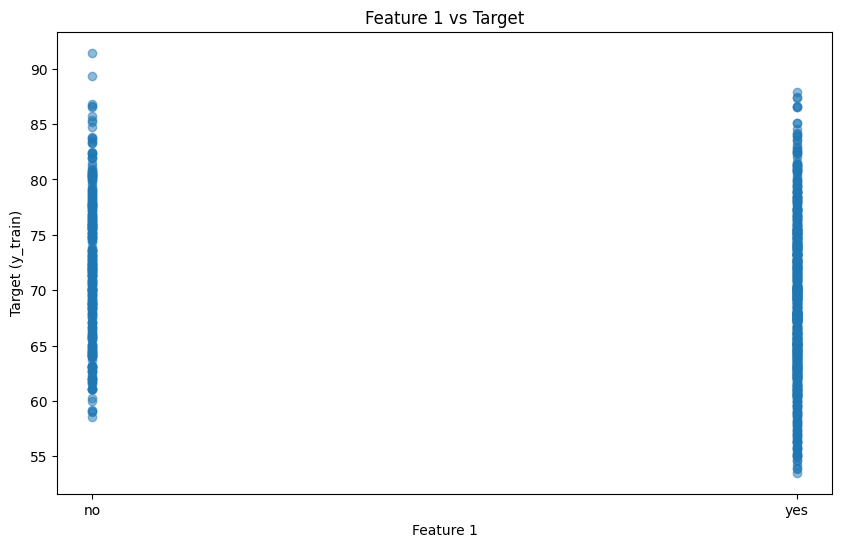

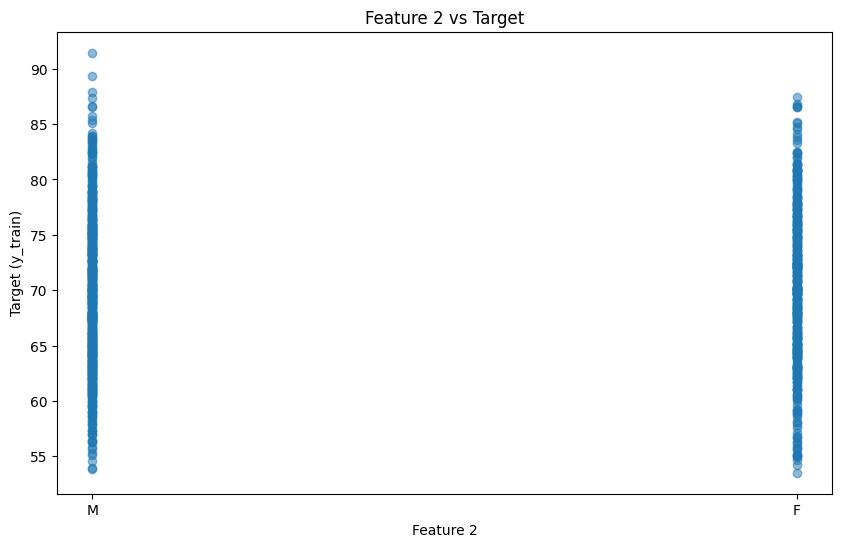

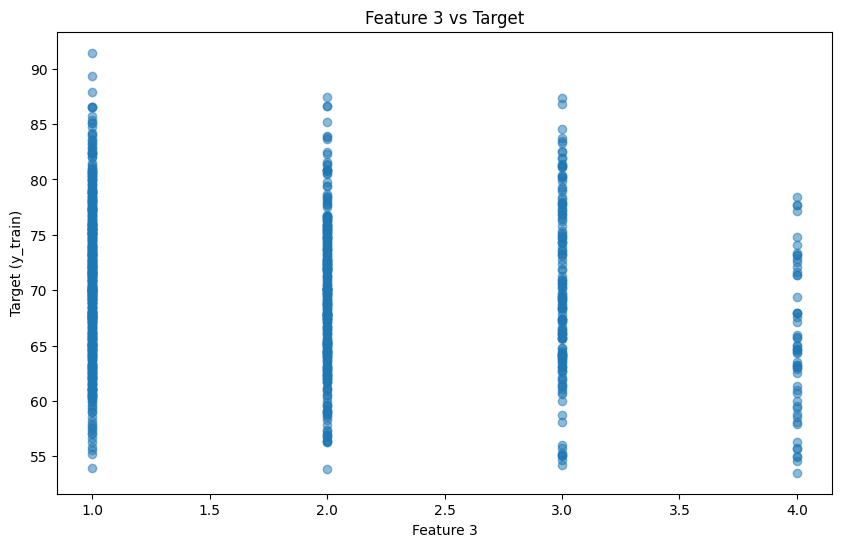

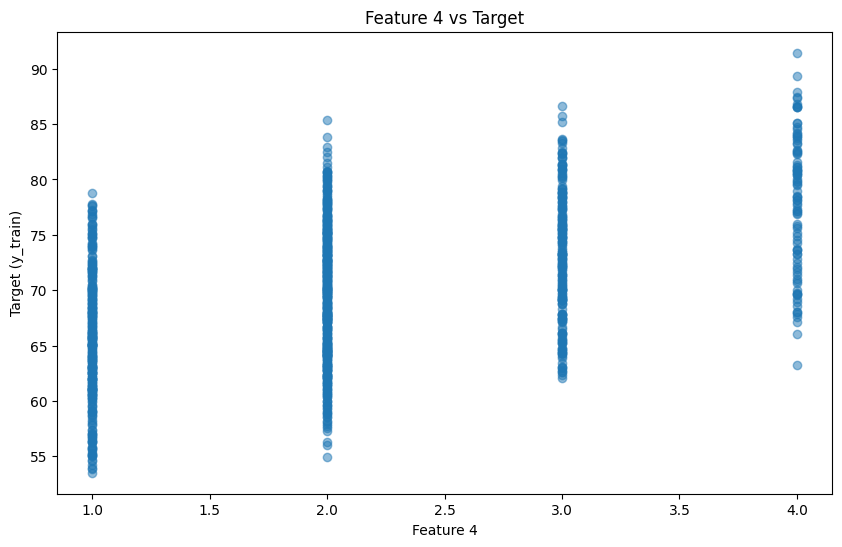

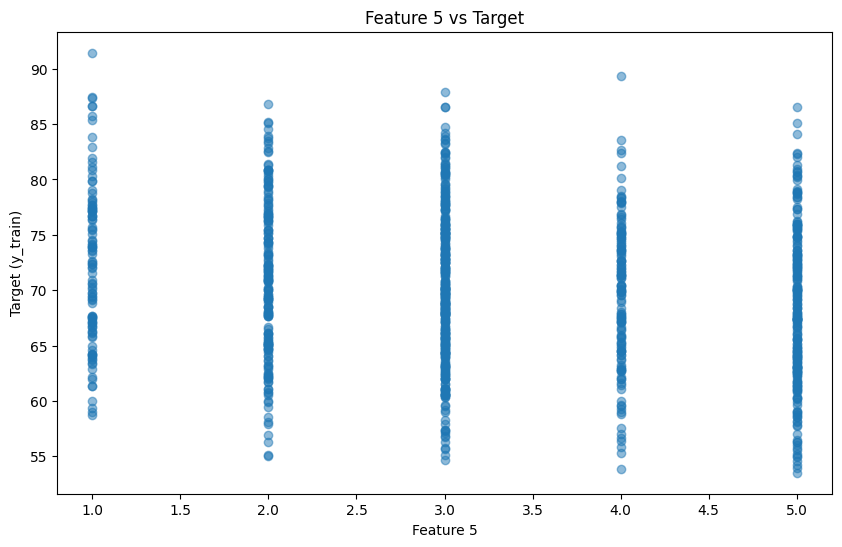

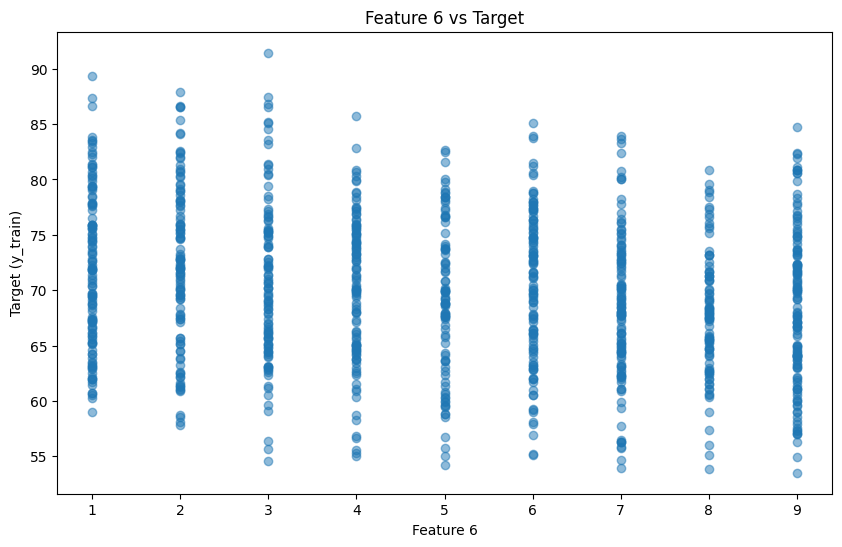

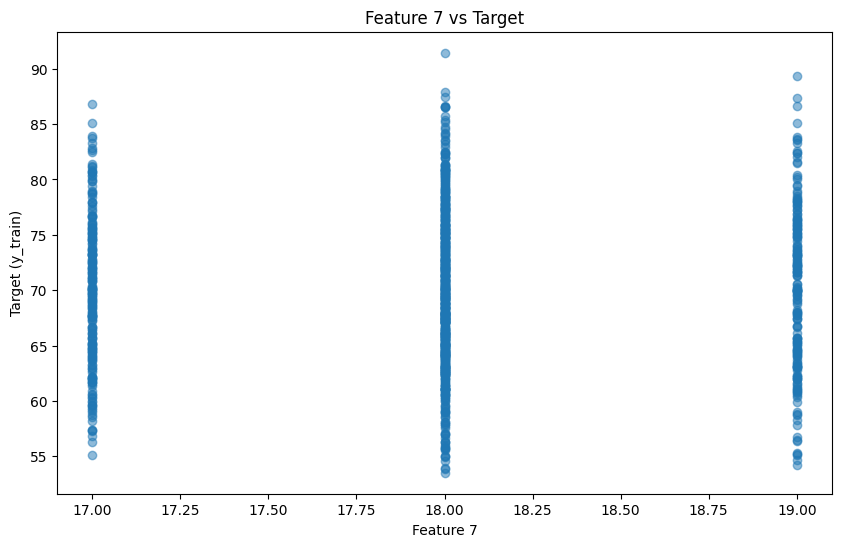

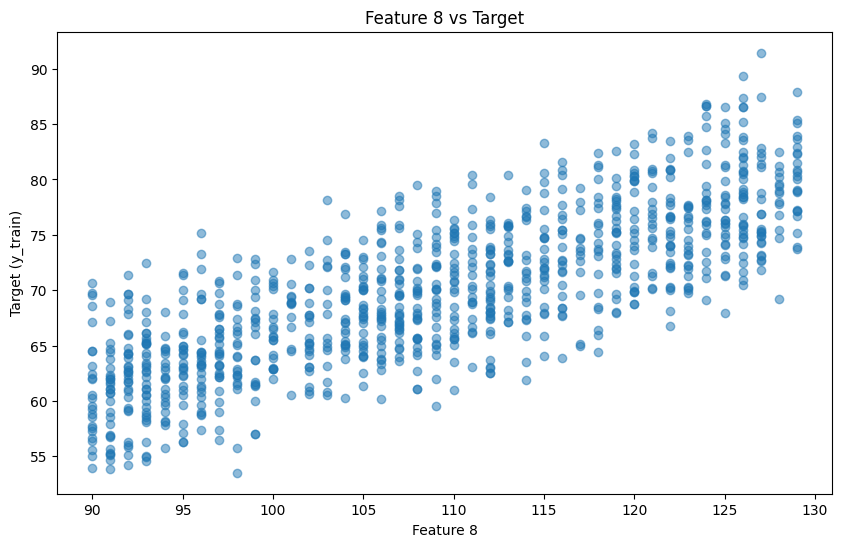

In [8]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('/Users/swethankreddy/Downloads/Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

def plot_features(x_train, y_train):
    num_features = x_train.shape[1]
    for i in range(num_features):
        plt.figure(figsize=(10, 6))
        plt.scatter(x_train[:, i], y_train, alpha=0.5)
        plt.title(f'Feature {i+1} vs Target')
        plt.xlabel(f'Feature {i+1}')
        plt.ylabel('Target (y_train)')
        plt.show()

plot_features(x_train, y_train)
# To get an idea whether to add some features or not
# Add some features if required in x_train

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
    # Convert categorical features to numerical values
    categorical_columns = [i for i in range(x_train.shape[1]) if isinstance(x_train[0, i], str)]
    
    for col in categorical_columns:
        unique_values = np.unique(x_train[:, col])
        value_to_int = {val: idx for idx, val in enumerate(unique_values)}
        x_train[:, col] = np.array([value_to_int[val] for val in x_train[:, col]])
    
    return x_train

x_train = feature_changing(x_train)

In [9]:
def z_score(x_train):

    x_mean = np.mean(x_train, axis=0)
    x_std = np.std(x_train, axis=0)
    x_std[x_std == 0] = 1 
    x_train = (x_train - x_mean) / x_std

    return x_train,x_std,x_mean

In [10]:
def cost(x_train, y_train, w, b):
    m = x_train.shape[0] 
    
    
    y_predict = np.dot(x_train, w) + b
    
   
    loss = (1 / (2 * m)) * np.sum((y_predict - y_train) ** 2)
    
    return loss


In [11]:
def gradient_descent(x_train, y_train, w, b, learning_rate=0.01):
    m = x_train.shape[0]
    y_predict = np.dot(x_train, w) + b
    dw = (1/m) * np.dot(x_train.T, (y_predict - y_train))
    db = (1/m) * np.sum(y_predict - y_train)
    w -= learning_rate * dw
    b -= learning_rate * db
    return w, b

In [12]:
x_train = x_train.astype(np.float64)
x_train, x_std, x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('/Users/swethankreddy/Downloads/Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('/Users/swethankreddy/Downloads/Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
